# Exploring Data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('datos.txt', sep=';', index_col=0)
df.head()

Citations  Industry Income  International Outlook  Research  \
Name                                                                        
1 UC.CL            89.7             98.9                   92.3      99.8   
2 USP.BR           74.9             56.0                   59.9     100.0   
3 UNICAMP.BR       71.0             71.8                   57.1      99.9   
4 PUC-RIO.BR       67.5            100.0                   76.7      98.6   
5 ITESM.MX         75.6             99.9                   87.4      96.2   

              Teaching  
Name                    
1 UC.CL           75.1  
2 USP.BR          91.7  
3 UNICAMP.BR      92.6  
4 PUC-RIO.BR      84.1  
5 ITESM.MX        77.9

In [2]:
import seaborn as sns
pd.set_option('precision',2)
cm = sns.light_palette("lightblue", as_cmap=True)

if(len(df) > 50):
    s = df.head(50).style.background_gradient(cmap=cm)
else:
    s = df.style.background_gradient(cmap=cm)
s

In [3]:
df.describe()

Citations  Industry Income  International Outlook  Research  Teaching
count      50.00            50.00                  50.00     50.00     50.00
mean       61.47            53.62                  50.44     77.53     71.57
std        23.15            20.69                  20.31     14.18     14.45
min        11.00            36.50                  18.90     40.10     40.80
25%        40.30            38.50                  31.10     67.38     62.60
50%        60.75            42.75                  48.00     80.10     72.30
75%        80.83            58.20                  67.53     86.80     83.52
max        99.80           100.00                  92.30    100.00     95.90

# Box Plots

In [4]:

import plotly.express as px
import pandas as pd
import seaborn as sns

dft = df.copy()
dft['Name'] = dft.index

lis = []
for indicador in df.columns:
    fig = px.box(dft, y=indicador, hover_name='Name', points='all')
    
    lis.append(fig)



In [5]:
import ipyvuetify as v
import plotly.graph_objs as go


#Display BoxPlots with ipyvuetify to make them responsive

v.Layout(row=True, wrap=True, align_center=True, children=[
            
            v.Flex(xs12=True, lg6=True, xl4=True, children=[
                go.FigureWidget(x)
            ]) for x in lis
                        
        ])
    

Layout(align_center=True, children=[Flex(children=[FigureWidget({
    'data': [{'alignmentgroup': 'True',
    …

# Plotly scatter matrix

In [6]:
import plotly.express as px
listfigListPCA = []
indicators = df.columns
df['Name'] = df.index
figSM = px.scatter_matrix(df, dimensions=indicators, hover_name="Name")

listfigListPCA.append(figSM)

In [7]:

v.Layout(row=True, wrap=True, align_center=True, children=[            
            v.Flex(xs12=True, lg6=True, xl4=True, children=[
                go.FigureWidget(x)
            ]) for x in listfigListPCA                        
        ])

Layout(align_center=True, children=[Flex(children=[FigureWidget({
    'data': [{'dimensions': [{'axis': {'matc…

In [8]:
df.drop(columns=['Name'], inplace = True)#Quitar columna temporal

# Seaborn pairplot

https://seaborn.pydata.org/tutorial/distributions.html#visualizing-pairwise-relationships-in-a-dataset

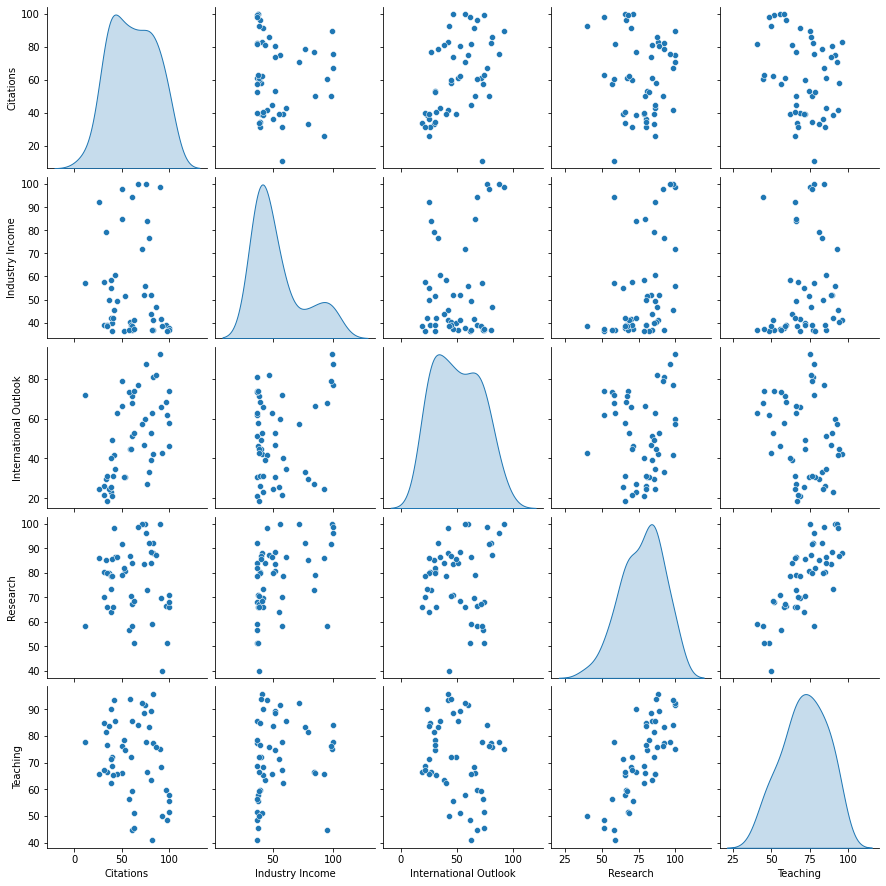

In [9]:
import seaborn as sns

figS = sns.pairplot(df, diag_kind='kde')

# PCA - Raw Data

sklearn - StandardScaler +
Sklearn decomposition - PCA

Explaned variance [PC1, PC2]

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA(n_components=2, svd_solver='full')
x_pca = pca.fit_transform(scaler.fit_transform(df))

print(pca.explained_variance_)

[2.07549446 1.57236675]


In [11]:
df_pca = pd.DataFrame(index = df.index, columns=['PC1', 'PC2'])
for i in range(0,len(x_pca)):    
    df_pca.iloc[i] = x_pca[i]



__________
## 2D PCA projection

In [12]:
import plotly.express as px

figListPCA = []

df_pca['Name'] = df_pca.index
fig = px.scatter(df_pca, x="PC1", y="PC2", text="Name")
figListPCA.append(fig)

In [13]:
import plotly.express as px

df_pca['Name'] = df_pca.index
fig = px.scatter(df_pca, x="PC1", y="PC2", hover_data=['Name'])
figListPCA.append(fig)


In [ ]:

#Display scatterplots with ipyvuetify to make them responsive

v.Layout(row=True, wrap=True, align_center=True, children=[
            
            v.Flex(xs12=True, lg6=True, xl4=True, children=[
                go.FigureWidget(x)
            ]) for x in figListPCA
                        
        ])

# PCA - Div by Max

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def divByMax(df):
  dfT = df.copy()
  for col in df.columns:
    dfT[col] = df[col]/df[col].max()
  return dfT


scaler = StandardScaler()
pca = PCA(n_components=2, svd_solver='full')
x_pca = pca.fit_transform(scaler.fit_transform(divByMax(df)))

print(pca.explained_variance_)

In [ ]:
df_pca = pd.DataFrame(index = df.index, columns=['PC1', 'PC2'])
for i in range(0,len(x_pca)):    
    df_pca.iloc[i] = x_pca[i]

In [ ]:
import plotly.express as px

figListPCA = []

df_pca['Name'] = df_pca.index
fig = px.scatter(df_pca, x="PC1", y="PC2", text="Name")
figListPCA.append(fig)

In [ ]:
import plotly.express as px

df_pca['Name'] = df_pca.index
fig = px.scatter(df_pca, x="PC1", y="PC2", hover_data=['Name'])
figListPCA.append(fig)

In [ ]:

#Display scatterplots with ipyvuetify to make them responsive

v.Layout(row=True, wrap=True, align_center=True, children=[
            
            v.Flex(xs12=True, lg6=True, xl4=True, children=[
                go.FigureWidget(x)
            ]) for x in figListPCA
                        
        ])

# Multidimensional Scaling

In [ ]:
figListPCA = []

In [14]:
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn import manifold, datasets
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels

mds = manifold.MDS(n_components=2)

X_transformed_mds = mds.fit_transform(df)#Este métod calcula la matriz de disimilaridad a partir de la matriz de datos


dftS = pd.DataFrame(X_transformed_mds, index = df.index, columns=['D1', 'D2'])
dftS['Y'] = dftS.index 

fig = px.scatter(dftS, x="D1", y="D2", text = 'Y')
fig.update_traces(textposition='top center')
fig.update_layout(height=600, width = 800, title_text='MDS from raw data')
#fig.show()


In [15]:
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn import manifold, datasets
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels

def divByMax(df):
  dfT = df.copy()
  for col in df.columns:
    dfT[col] = df[col]/df[col].max()
  return dfT

mds = manifold.MDS(n_components=2)

X_transformed_mds = mds.fit_transform(divByMax(df))#Este métod calcula la matriz de disimilaridad a partir de la matriz de datos


dftS = pd.DataFrame(X_transformed_mds, index = df.index, columns=['D1', 'D2'])
dftS['Y'] = dftS.index 

fig = px.scatter(dftS, x="D1", y="D2", text = 'Y')
fig.update_traces(textposition='top center') 
fig.update_layout(height=600, width = 800, title_text='MDS from scaled data with DivByMax')
#fig.show()
figListPCA.append(fig)

In [26]:

#Display scatterplots with ipyvuetify to make them responsive

v.Layout(row=True, wrap=True, align_center=True, children=[
            
            v.Flex(xs12=True, lg6=True, xl4=True, children=[
                go.FigureWidget(x)
            ]) for x in figListPCA
                        
        ])

Layout(align_center=True, children=[Flex(children=[FigureWidget({
    'data': [{'hovertemplate': 'PC1=%{x}<br>…